
## Bankruptcy prediction using Machine Learning techniques 



###Team

Pragya Sharma and Rohan Tiwari.




###Motivation

Bankruptcy prediction is important for creditors and investors to evaluate the likelihood that a firm may go bankrupt. It allows stakeholders to take corrective action to limit their economic losses.  Bankruptcy prediction is an early warning to not just investors but also public policy makers to take proactive steps to minimize the impact of bankruptcies. 
This problem requires high recall as classifying a bankrupt firm as non-bankrupt will confuse investors. For this problem, false alerts are fine but it should not miss any firms that are going to go bankrupt.



### Data

https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?select=data.csv

The dataset has 96 columns (95 features and 1 class attribute) and 6819 instances. 



### Methodology

1. Our experiments will first begin by importing the data. The data is available in the file data.csv and will be loaded as a DataFrame. 
2. Next the data will be analyzed to check for class distributions, null values, missing values and any other sanity checks. 
3. The next step will be to divide the data into training and test datasets using appropriate form of sampling
4. Several experiments will be run using different Machine Learning algorithms and their performance will be evaluated on test set after tuning hyperparameters.
5. The results will be compared to determine the best performing algorithm.

### References
1. Undersampling bankruptcy prediction: Taiwan bankruptcy data. Haoming Wang and Xiangdong Liu. Published online 2021 Jul 1. doi: 10.1371/journal.pone.0254030.
2. Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.

### Statement of contributions by each team member

#### Rohan Tiwari
1. Preprocessing the data - handling missing values, categorical features, feature scaling and utility functions.
2. Logistic Regression
3. Support Vector Machines
4. PCA
5. Support Vector Machines with PCA
6. Random Forest Classifier
7. AdaBoost Classifier
8. Gradient Boosting Classifier

#### Pragya Sharma
TBD

In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


## Reading the data

This section reads the data from .csv file and splits it appropriately into training and test datasets.

In [1]:
# read the data 
import os
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")
data.head()



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


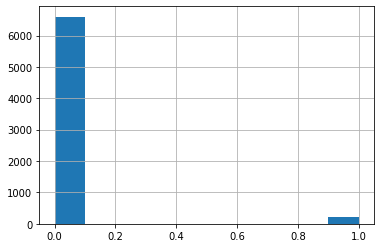

In [2]:
#check distribution of bankrupt variable which is the target variable

data['Bankrupt?'].hist()

As seen above, the target variable is highly imbalanced as is also mentioned in the paper by Liang et. al. To better handle this imbalanced class data, stratified sampling is used.

Also, to take care of this class imbalance problem, class_weight='balanced' parameter is used in the classifiers.  This modifies the training procedure for classifiers to take into account the imbalance classes. By default, equal weights are assigned but with class_weight='balanced' weights are assigned during training that are inversely proportional to the frequency of classes. This penalizes the misclassification more for the minority class compared to the majority one. 

A training-test split of 80-20 is used in the stratified sampling implementation below.

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Bankrupt?"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X_raw = strat_train_set.drop("Bankrupt?", axis=1)
y = strat_train_set["Bankrupt?"].copy()

X_test = strat_test_set.drop("Bankrupt?", axis=1)
y_test = strat_test_set["Bankrupt?"].copy()


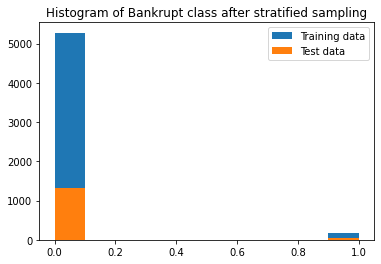

In [4]:
import matplotlib.pyplot as plt

plt.hist(strat_train_set["Bankrupt?"], label="Training data")
plt.hist(strat_test_set["Bankrupt?"], label="Test data")
plt.title("Histogram of Bankrupt class after stratified sampling")
plt.legend()
plt.show()

## Preprocessing the data

This section applies appropriate preprocessing steps to the data to make it ready for training models.

### Handling Missing values

In [5]:
X_raw.shape

(5455, 95)

In [6]:
X_raw[X_raw.isnull().any(axis=1)].shape

(0, 95)

In [7]:
X_raw[X_raw.isna().any(axis=1)].shape

(0, 95)

The training data has 5455 observations and 95 features. There is no missing values as shown by the checks for null and na values. 

### Categorical features

In [8]:
X_raw.dtypes

 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 95, dtype: object

After checking the datatypes of all columns in the dataset it was determined that the columns are all numerical attributes and there is no categorical data. 

Implemented below are some utility functions for the project.

### Feature Scaling

All the features are scaled(standardized) using MinMaxScaler.
The transformed values are between 0 and 1 i.e. they are normalized same as Liang et. al. 

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scalar = MinMaxScaler()
Standard_X = minmax_scalar.fit(X_raw)
X_raw_transformed = Standard_X.transform(X_raw)
X = pd.DataFrame(X_raw_transformed, columns=X_raw.columns,index=X_raw.index)
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
318,0.481189,0.550153,0.528832,0.899832,0.898654,0.998980,0.797443,0.791807,0.257162,0.781616,...,0.806631,1.666653e-13,0.623661,0.899830,0.756845,0.164776,0.026814,0.565265,0.0,0.070742
5796,0.522808,0.590765,0.558633,0.901002,0.899628,0.999023,0.797454,0.791812,0.257087,0.781621,...,0.827723,1.098794e-13,0.624307,0.900998,0.760811,0.172086,0.026852,0.565433,0.0,0.022433
4454,0.514614,0.586895,0.551487,0.912184,0.910989,0.999103,0.797606,0.791933,0.257191,0.781718,...,0.828627,2.551415e-13,0.624714,0.912185,0.758880,0.165181,0.026791,0.565159,0.0,0.059856
2225,0.456508,0.536851,0.504459,0.895097,0.893925,0.998967,0.797390,0.791761,0.257093,0.781572,...,0.797846,3.156365e-13,0.624621,0.895093,0.756233,0.173438,0.027673,0.567450,0.0,0.020864
3249,0.376418,0.443197,0.412785,0.999014,0.997706,0.995856,0.794096,0.788379,0.257894,0.777918,...,0.756573,2.014380e-14,0.624242,0.999011,0.752978,0.163429,0.026791,0.565158,0.0,0.233952


In [10]:
X_test_transformed = Standard_X.transform(X_test)
X_test = pd.DataFrame(X_test_transformed, columns=X_raw.columns,index=X_test.index)
X_test.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1244,0.490882,0.556149,0.536753,0.916182,0.914982,0.999043,0.797445,0.791801,0.257024,0.781609,...,0.805667,8.455800e-14,0.623746,0.916184,0.757387,0.171791,0.027273,0.566736,0.0,0.022839
6303,0.473195,0.547754,0.514374,0.900265,0.899087,0.999002,0.797424,0.791782,0.257078,0.781591,...,0.803448,1.984405e-13,0.623652,0.900264,0.756747,0.167366,0.027098,0.566292,0.0,0.035415
4712,0.543293,0.618513,0.596023,0.913863,0.912710,0.999043,0.797758,0.792117,0.257607,0.781922,...,0.839238,2.078966e-13,0.623843,0.913858,0.760748,0.167460,0.026816,0.565273,0.0,0.034892
3273,0.655558,0.692324,0.699164,0.947299,0.946059,0.999314,0.797808,0.792131,0.257096,0.781935,...,0.879037,1.159977e-13,0.624215,0.947295,0.763387,0.165097,0.026805,0.565222,0.0,0.061798
6430,0.436972,0.509976,0.477926,0.977962,0.976281,0.998738,0.797212,0.791509,0.257271,0.781240,...,0.782600,8.604712e-14,0.623938,0.977957,0.754912,0.163497,0.026709,0.564734,0.0,0.207130


### Utility Functions

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)

In [12]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

column_names = ["Accuracy", "ROC AUC", "Precision", "Recall"]
training_stats_df = pd.DataFrame(columns=column_names)
test_stats_df = pd.DataFrame(columns=column_names)

def calculate_model_stats(estimator, X_data, y_data, model_name, training):
  global training_stats_df
  global test_stats_df 
  y_pred = estimator.predict(X_data)
  y_score = estimator.predict_proba(X_data)[:,1]      #this is the score
  fpr, tpr, thresholds = roc_curve(y_data, y_score)
  plt.figure(figsize=(8, 6))
  plot_roc_curve(fpr, tpr)
  plt.title('ROC Curve')
  plt.grid(True)
  plt.show()

  accuracy = accuracy_score(y_data, y_pred)
  print("accuracy:", accuracy)
  roc_auc = roc_auc_score(y_data, y_score)
  print(" ROC AUC Score: ", roc_auc)
  precision = precision_score(y_data,y_pred)
  print(" Precision score: ", precision )
  recall = recall_score(y_data,y_pred)
  print ("Recall score:", recall)

  if training == True:
    df = pd.DataFrame([[accuracy, roc_auc, precision, recall]], columns=column_names, index=[model_name])    
    training_stats_df = training_stats_df.append(df)
    #training_stats_df = training_stats_df.drop_duplicates()
  else:
    df = pd.DataFrame([[accuracy, roc_auc, precision, recall]], columns=column_names, index=[model_name])    
    test_stats_df = test_stats_df.append(df)
   # test_stats_df = test_stats_df.drop_duplicates()



In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,
                                                                        X, y, cv=3,return_times=True)
  #
  # Calculate training and test mean and std
  #
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  #
  # Plot the learning curve
  #
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  #plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  #plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title('Learning Curve')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='upper right')
  plt.show()

## Logistic Regression

We start with logistic regression on the bankruptcy data. This is a binary classifier that predicts the probability of a class. Instead of outputting the prediction directly it outputs the logistic of the result. The logistic is a sigmoid function which takes values between 0 and 1.  The model is trained by optimizing parameters such that it predicts higher probabilities for positive instances and lower for negative instances.

#### Training and hyperparameter tuning

From Sklearn documentation:
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

log_reg = LogisticRegression(random_state=42)
params = {"C": uniform(0.1, 100), "solver":['liblinear'], 
          'penalty':['l1','l2']}
rnd_search_log_reg = RandomizedSearchCV(log_reg, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
rnd_search_log_reg.fit(X,y)
print("best params are: ", rnd_search_log_reg.best_params_)
print("best estimator:", rnd_search_log_reg.best_estimator_)


best params are:  {'C': 18.44347898661638, 'penalty': 'l2', 'solver': 'liblinear'}
best estimator: LogisticRegression(C=18.44347898661638, random_state=42, solver='liblinear')


#### Evaluation over training set

***Performance stats for logistic regression over training data***


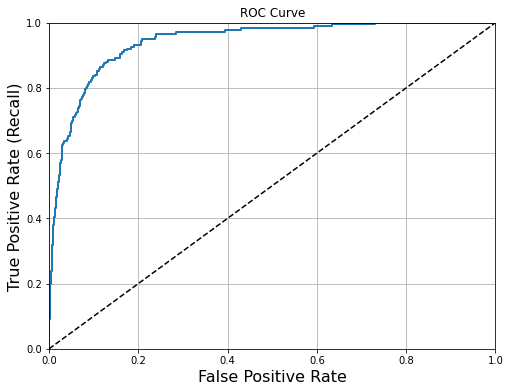

accuracy: 0.9710357470210815
 ROC AUC Score:  0.9414468132738637
 Precision score:  0.6730769230769231
Recall score: 0.19886363636363635


In [14]:
print("***Performance stats for logistic regression over training data***")
calculate_model_stats(rnd_search_log_reg.best_estimator_, X,y, "log reg", True)

#### Evaluation over test set

***Performance stats for logistic regression over test data***


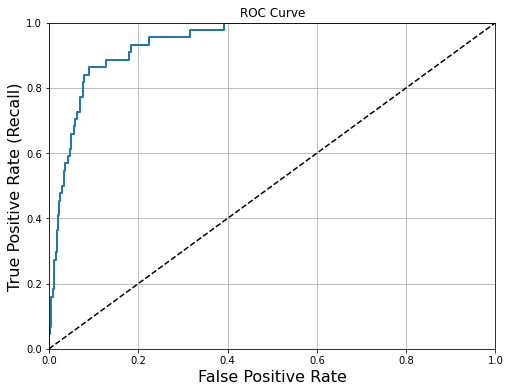

accuracy: 0.967008797653959
 ROC AUC Score:  0.9404786501377411
 Precision score:  0.4666666666666667
Recall score: 0.1590909090909091


In [15]:
print("***Performance stats for logistic regression over test data***")
calculate_model_stats(rnd_search_log_reg.best_estimator_, X_test, y_test,"log reg", False)

#### Learning Curves

We plot learning curves using the best model on the training set, with a cross-validation of 3

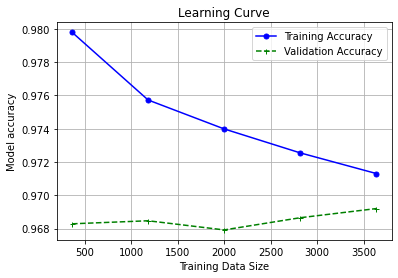

In [22]:
plot_learning_curve(rnd_search_log_reg.best_estimator_, X,y)

There is some overfitting at lower data sizes because there is a  gap between curves. But it gets gradually better as the number of instances increase and the gap reduces.

## Support Vector Machines

SVMs are used as classifiers to separate the classes with the widest possible "street" as possible. It tries to minimize the number of margin violations. 

This section trains a SVM classifier on the training data.  The best hyperparameters are searched using CV=3.

#### Training and hyperparameter tuning

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear", "sigmoid"], "gamma": reciprocal(0.001, 100)}
clf = SVC(random_state=42, probability=True, class_weight='balanced')
rnd_search_svm = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
rnd_search_svm.fit(X,y)
print("best params are: ", rnd_search_svm.best_params_)
print("best estimator is:", rnd_search_svm.best_estimator_)



best params are:  {'C': 61.848150962771655, 'gamma': 1.14357802784334, 'kernel': 'rbf'}
best estimator is: SVC(C=61.848150962771655, class_weight='balanced', gamma=1.14357802784334,
    probability=True, random_state=42)


#### Evaluation over training set

***Performance stats for SVM over training data***


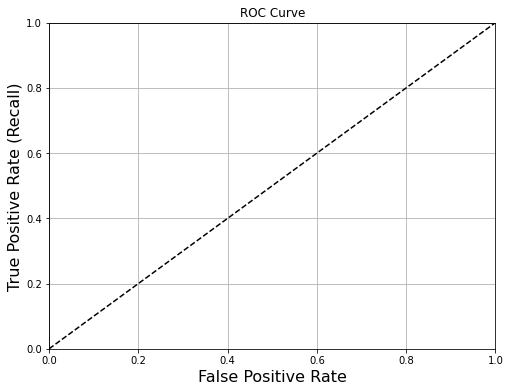

accuracy: 0.998166819431714
 ROC AUC Score:  0.999641590177203
 Precision score:  0.946236559139785
Recall score: 1.0


In [ ]:
print("***Performance stats for SVM over training data***")
calculate_model_stats(rnd_search_svm.best_estimator_, X,y, "svm", True)


The recall score is perfect on the training set and the precision is also high. ROC AUC and accuracy are ver high as well on the training set.

#### Evaluation over test set

Next step is to evaluate the performance of the best SVM classifer on the test dataset. 


***Performance stats for SVM over test data***


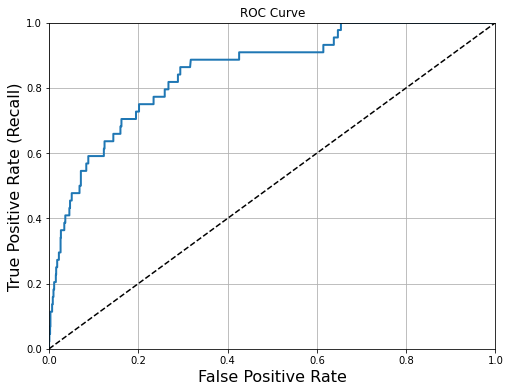

accuracy: 0.9523460410557185
 ROC AUC Score:  0.8514118457300275
 Precision score:  0.2765957446808511
Recall score: 0.29545454545454547


In [ ]:
print("***Performance stats for SVM over test data***")
calculate_model_stats(rnd_search_svm.best_estimator_, X_test, y_test, "svm", False)

Precision and recall are lower than the training set. Acuuracy drops over the test set so does the ROC AUC but both are still reasonably high.

#### Learning Curves

Learning curves are plotted on training set using cv=3.

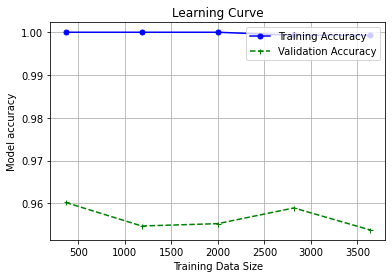

In [24]:
plot_learning_curve(rnd_search_svm.best_estimator_, X,y)

The curves show overfitting on the training set but a lesser accuracy on the validation set. The curves do not get closer when the training data size increases indicating that adding instances does not help reduce overfitting.   The accuracies are close to each other so the overfitting is not much.

##PCA

In [25]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=0.95)
X_reduced_pca=pca.fit_transform(X)
X_recoverd_pca = pca.inverse_transform(X_reduced_pca)
mean_squared_error(X, X_recoverd_pca)

0.0004940635018922932

In [26]:
pca.explained_variance_ratio_

array([0.16875855, 0.14554589, 0.10771396, 0.0871236 , 0.08584253,
       0.07774439, 0.06455178, 0.04941605, 0.04828937, 0.03704018,
       0.02501054, 0.01816285, 0.01288172, 0.01181515, 0.0078574 ,
       0.00651295])

In [27]:
pca.n_components_

16

16 components are able to cover 95% of the variance.

## Support Vector Machines with PCA

PCA performs feature selection on the input dataset. PCA projects the high dimensional data onto an axis such that largest amount of  variance is accounted for. It then identifies another axis orthogonal to the first one which accounts for the second largest amount of variance and so on. Our dataset has 95 attributes, so we explore if we can get similar model performance with lesser number of dimensions. 

PCA is  performed on the input dataset with an explained variance ratio of 95%.

#### Training and hyperparameter tuning

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {"C": uniform(0.1, 100), "kernel" : ["rbf", "linear", "sigmoid"], "gamma": reciprocal(0.001, 100)}
clf = SVC(random_state=42, probability=True ,class_weight="balanced")
rnd_search_svm_pca = RandomizedSearchCV(clf, params, n_jobs=-1, cv=3, scoring="accuracy", n_iter=10, random_state=42)
rnd_search_svm_pca.fit(X_reduced_pca,y)
print("best estimator is: ", rnd_search_svm_pca.best_estimator_)
print("best params are: ", rnd_search_svm_pca.best_params_)

best estimator is:  SVC(C=61.848150962771655, class_weight='balanced', gamma=1.14357802784334,
    probability=True, random_state=42)
best params are:  {'C': 61.848150962771655, 'gamma': 1.14357802784334, 'kernel': 'rbf'}


#### Evaluation over training set

***Performance stats for SVM (with pca) over training data***


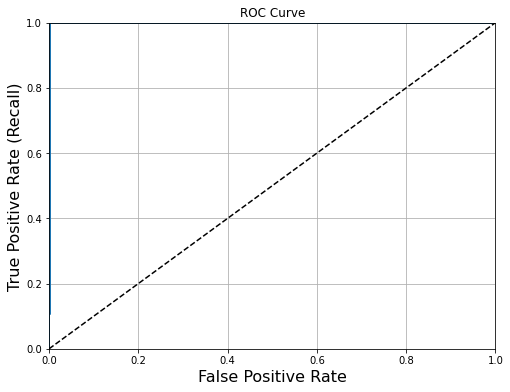

accuracy: 0.9923006416131989
 ROC AUC Score:  0.9987708588059033
 Precision score:  0.8073394495412844
Recall score: 1.0


In [ ]:
print("***Performance stats for SVM (with pca) over training data***")
calculate_model_stats(rnd_search_svm_pca.best_estimator_,X_reduced_pca,y, "svm (with pca)", True)

The numbers using PCA are pretty similar to what we saw for SVM without PCA over training data. Precision drops slightly but for this problem recall is more important. This means focussing on PCs does not reduce model performance over training data.


#### Evaluation over test set

Next step is to evaluate the performance of the best SVM classifer on the test dataset. 
Note that pca is not recalculated and fit over the test set. The already fit pca over the training set is used to perform a transform over the testset. This avoids data leaking (as the combined dataset isn't fitted with pca) and it also avoids introducing errors by fitting on train/test separately as the resulting components may have different directions in that case.


***Performance stats for SVM (with pca) over test data***


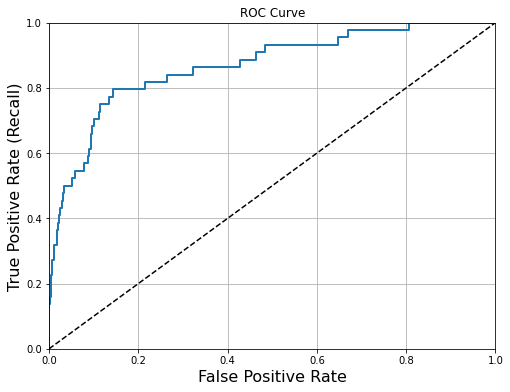

accuracy: 0.9567448680351907
 ROC AUC Score:  0.8682851239669421
 Precision score:  0.35294117647058826
Recall score: 0.4090909090909091


In [ ]:
X_test_reduced = pca.transform(X_test)

print("***Performance stats for SVM (with pca) over test data***")
calculate_model_stats(rnd_search_svm_pca.best_estimator_,X_test_reduced,y_test, "svm (with pca)", False)

The numbers using PCA are slightly better to what we saw for SVM without PCA over test data. This means that PCA is helping improve performance of our SVM classifier over test data.


#### Learning Curves

Learning curves are plotted on training dataset with cv=3.

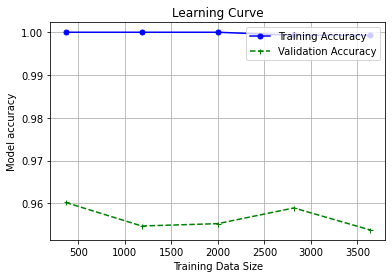

In [29]:
plot_learning_curve(rnd_search_svm_pca.best_estimator_, X,y)

This is pretty much similar to SVMs without PCA. The accuracy on validation set does not improve much by adding more instances of training data. The model is slightly overfitting overall due to the gap between curves which does not reduce with increasing training data size.

## Random Forest Classifier

Random Forest is based on Bagging. Bagging stands for boostrap aggregation. Bagging samples the given training set with replacement and trains individual models. The final ensemble model's output is based on majority voting. Random Forest randomly selects a set of training instances (with replacement) and trains a decision tree. 

RandomForestClassifier is tuned using GridSearchCv over n_estimators=[500, 750, 100], max_leaf_nodes = [16,32, 64] over cv=10. 

#### Training and hyperparameter tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rndforest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {"n_estimators": [500, 750, 1000], "max_leaf_nodes" : [16, 32, 64], "class_weight":["balanced"]}
grid_search_rnd_clf = GridSearchCV(rndforest_clf, params, n_jobs=-1, cv=3, scoring="accuracy")
grid_search_rnd_clf.fit(X,y)
print("best params from grid search for random forest classifier are: ", grid_search_rnd_clf.best_params_)
print("Best estimator is:", grid_search_rnd_clf.best_estimator_)


best params from grid search for random forest classifier are:  {'class_weight': 'balanced', 'max_leaf_nodes': 64, 'n_estimators': 500}
Best estimator is: RandomForestClassifier(class_weight='balanced', max_leaf_nodes=64,
                       n_estimators=500, n_jobs=-1, random_state=42)


#### Evaluation over training set

***Performance stats for RandomForestClassifier over training data***


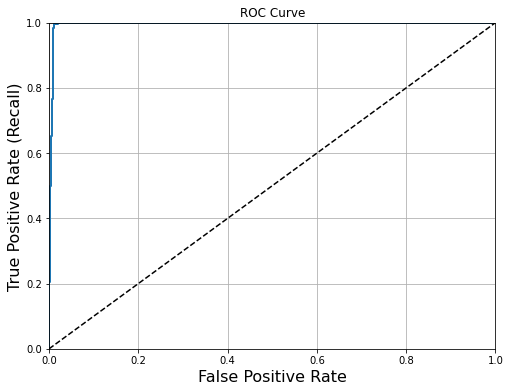

accuracy: 0.9827681026581119
 ROC AUC Score:  0.9959573955122354
 Precision score:  0.6529850746268657
Recall score: 0.9943181818181818


In [ ]:
print("***Performance stats for RandomForestClassifier over training data***")
calculate_model_stats(grid_search_rnd_clf.best_estimator_,X,y, "rnd_forest", True)

#### Evaluation over test set

***Performance stats for RandomForestClassifier over test data***


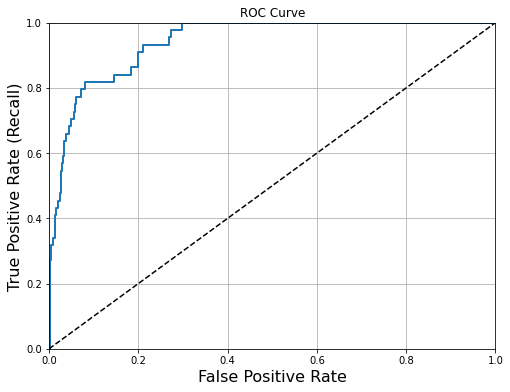

accuracy: 0.9604105571847508
 ROC AUC Score:  0.9413567493112948
 Precision score:  0.40384615384615385
Recall score: 0.4772727272727273


In [ ]:
print("***Performance stats for RandomForestClassifier over test data***")
calculate_model_stats(grid_search_rnd_clf.best_estimator_,X_test,y_test, "rnd_forest", False)

RandomForestClassifier gives much higher precision, ROC AUC score and accuracy as SVM and lower recall on test set compared to the SVM model.

#### Learning Curves

Learning curves are plotted on training dataset with cv=3.

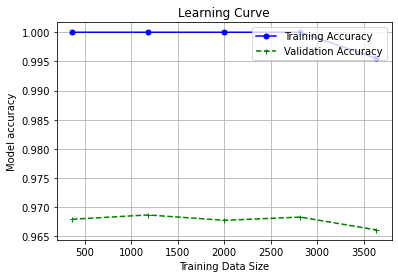

In [31]:
plot_learning_curve(grid_search_rnd_clf.best_estimator_, X,y)

Looks similar to SVMs. There is slightly overfitting because of the gap between the curves and it does not get any better with increasing training data size. Accuracies are close in value but there is still a gap so the overfitting is not that much.

## AdaBoost Classifier

Next we train an AdaBoost Classifier on our data. Adaboost is an ensemble method. It starts with a base classifier e.g. DecisionTree. It then assigns higher weights to instances that were misclassified by the first model and uses these weights to train the next model and so on. The process continues till a low error is achieved. The last step is to build an ensemble from all these trained individual models. 

#### Training and hyperparameter tuning

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, max_leaf_nodes = 64), n_estimators=500,
    algorithm="SAMME.R", learning_rate=1.0, random_state = 42)

params = {"base_estimator__criterion" : ["gini"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [500]
             }

grid_search_adaboost = GridSearchCV(ada_clf, 
                              params, n_jobs=-1, cv=3)
grid_search_adaboost.fit(X, y)
print("best estimator is: ", grid_search_adaboost.best_estimator_)
print("best params are: ", grid_search_adaboost.best_params_)

best estimator is:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         max_leaf_nodes=64),
                   n_estimators=500, random_state=42)
best params are:  {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 500}


#### Evaluation over training set

***Performance stats for AdaBoost Classifier over training data***


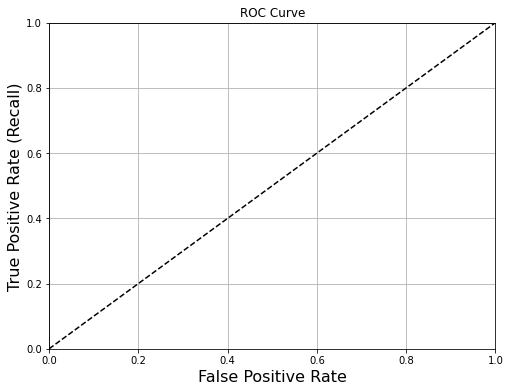

accuracy: 1.0
 ROC AUC Score:  1.0
 Precision score:  1.0
Recall score: 1.0


In [ ]:
print("***Performance stats for AdaBoost Classifier over training data***")
calculate_model_stats(grid_search_adaboost.best_estimator_,X,y, "ada_boost", True)

AdaBoostClassifier gives perfect scores.

#### Evaluation over test set

***Performance stats for AdaBoost Classifier over test data***


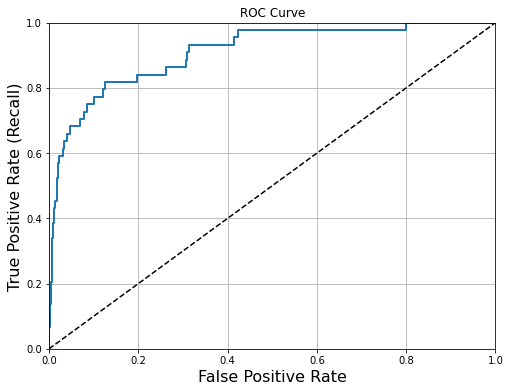

accuracy: 0.9714076246334311
 ROC AUC Score:  0.9095557851239668
 Precision score:  0.6
Recall score: 0.3409090909090909


In [ ]:
print("***Performance stats for AdaBoost Classifier over test data***")
calculate_model_stats(grid_search_adaboost.best_estimator_,X_test,y_test, "ada_boost", False)

Not so good over test data. AdaBoost was overfitting on the training data but accuracy and ROC AUC is still very high on test data.

#### Learning Curves

Learning curves are plotted on the training dataset using cv=3.

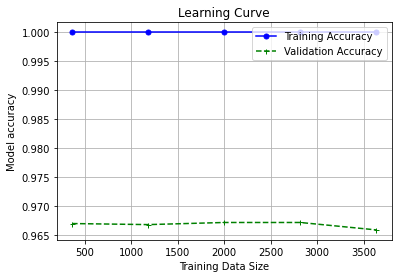

In [33]:
plot_learning_curve(grid_search_adaboost.best_estimator_, X,y)

There is gap between the curves and it does not reduce with adding training instances. The model is slightly overfitting as the accuracies are close but still there is a gap.

## Gradient Boosting Classifier

This is similar to the AdaBoost Classifier except that instead of tweaking weights at every step and training models, it trains models on the residual errors. 

#### Training and hyperparameter tuning

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(max_depth=2, learning_rate=1.0, random_state=42)

params = {'max_leaf_nodes': [32,64], 
          "n_estimators": [250, 500, 750]}

grid_search_gboost = GridSearchCV(grad_boost_clf, params, n_jobs=-1, cv=3)
grid_search_gboost.fit(X, y)
print("best estimator is: ", grid_search_gboost.best_estimator_)
print("best params are: ", grid_search_gboost.best_params_)

best estimator is:  GradientBoostingClassifier(learning_rate=1.0, max_depth=2, max_leaf_nodes=32,
                           n_estimators=250, random_state=42)
best params are:  {'max_leaf_nodes': 32, 'n_estimators': 250}


#### Evaluation over training set

***Performance stats for Gradient Boosting Classifier over training data***


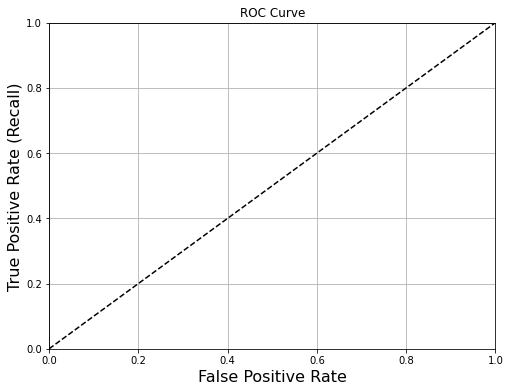

accuracy: 1.0
 ROC AUC Score:  1.0
 Precision score:  1.0
Recall score: 1.0


In [ ]:
print("***Performance stats for Gradient Boosting Classifier over training data***")
calculate_model_stats(grid_search_gboost.best_estimator_,X,y, "grad_boost", True)

#### Evaluation over test set

***Performance stats for Gradient Boosting Classifier over test data***


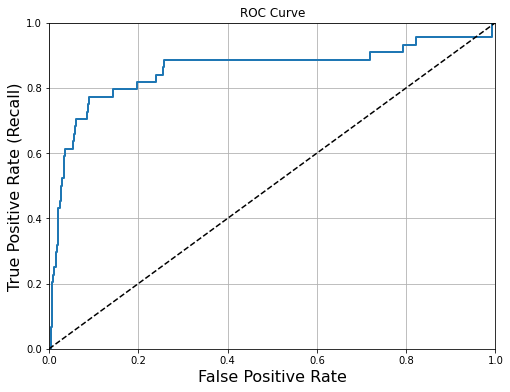

accuracy: 0.9618768328445748
 ROC AUC Score:  0.8553202479338843
 Precision score:  0.40476190476190477
Recall score: 0.38636363636363635


In [ ]:
print("***Performance stats for Gradient Boosting Classifier over test data***")
calculate_model_stats(grid_search_gboost.best_estimator_,X_test,y_test, "grad_boost", False)

Similar to AdaBoost, this gives perfect scores on training data. Accuracy and ROC AUC are high on test data but precision/recall fall. 

#### Learning Curves

Learning curves are plotted on training set using cv=3

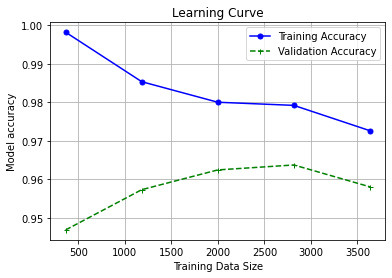

In [35]:
plot_learning_curve(grid_search_gboost.best_estimator_, X,y)

This curves looks better than most of the models and is pretty similar to the learning curve seen for logistic regression. There is some overfitting initially but as the training data size increases the overfitting reduces. One difference between the curves for logistic regression and Gradient boosting are that the curves are moving closer to each other at large training data sizes which is not the case for gradient boosting where after around 2700 training instances the accuracy is dropping for both.

# Summary of results

We present below a summary of results



## Training data
Below is a summary of performance metrics for the classifiers over training data

In [ ]:
training_stats_df

,Accuracy,ROC AUC,Precision,Recall
log reg,0.971036,0.941447,0.673077,0.198864
svm,0.998167,0.999642,0.946237,1.000000
svm (with pca),0.992301,0.998771,0.807339,1.000000
rnd_forest,0.982768,0.995957,0.652985,0.994318
ada_boost,1.000000,1.000000,1.000000,1.000000
grad_boost,1.000000,1.000000,1.000000,1.000000


## Test data
Below is a summary of performance metrics for the classifiers over test data

In [ ]:
test_stats_df

,Accuracy,ROC AUC,Precision,Recall
log reg,0.967009,0.940479,0.466667,0.159091
svm,0.952346,0.851412,0.276596,0.295455
svm (with pca),0.956745,0.868285,0.352941,0.409091
rnd_forest,0.960411,0.941357,0.403846,0.477273
ada_boost,0.971408,0.909556,0.600000,0.340909
grad_boost,0.961877,0.855320,0.404762,0.386364
